Title: Comparative Analysis of Regression and Classification Models for Predicting Student Academic Performance

Author: Okanlawon Micheal Olatunji

In [30]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [31]:
df = pd.read_csv(r"c:\Users\Pakistan\Downloads\student+performance\student-mat.csv", sep=';')

print(df.shape)
df.head()
df.info()

(395, 33)
<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    str  
 1   sex         395 non-null    str  
 2   age         395 non-null    int64
 3   address     395 non-null    str  
 4   famsize     395 non-null    str  
 5   Pstatus     395 non-null    str  
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    str  
 9   Fjob        395 non-null    str  
 10  reason      395 non-null    str  
 11  guardian    395 non-null    str  
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    str  
 16  famsup      395 non-null    str  
 17  paid        395 non-null    str  
 18  activities  395 non-null    str  
 19  nursery     395 non-null    str  
 20  higher      395 non-null    str  

In [32]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


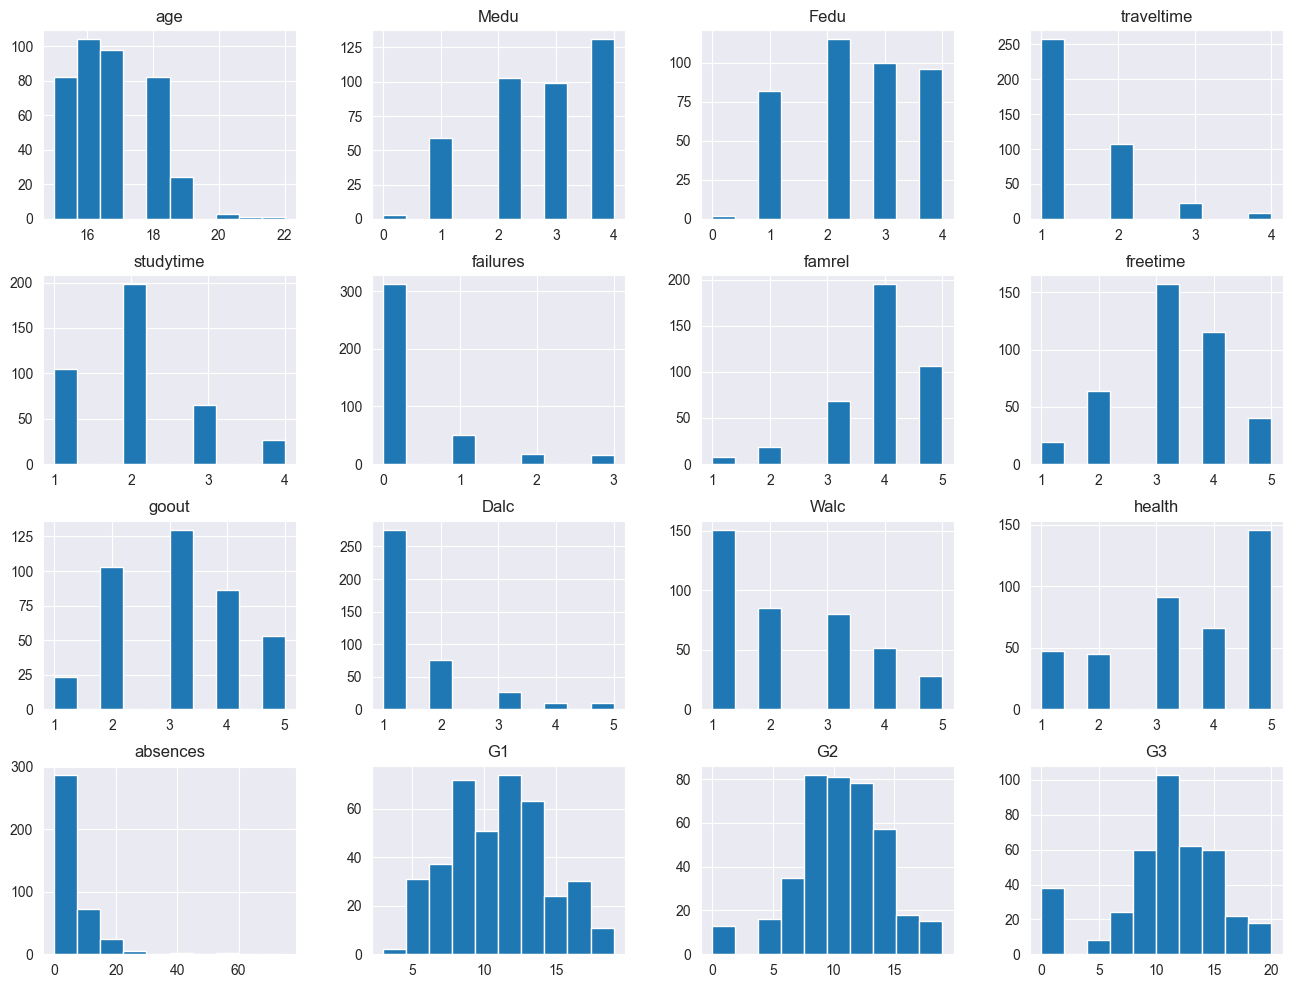

In [37]:
df.hist(figsize=(16,12))
plt.show()

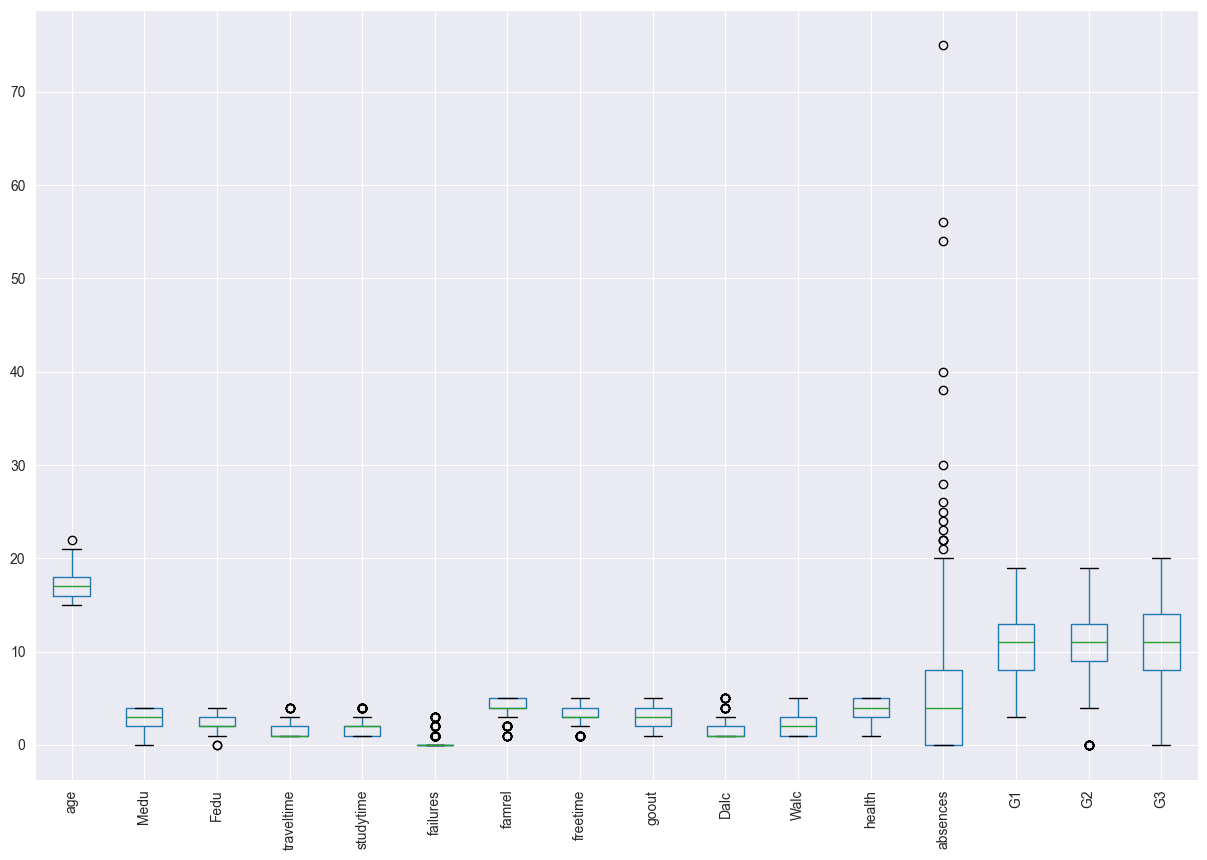

In [38]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

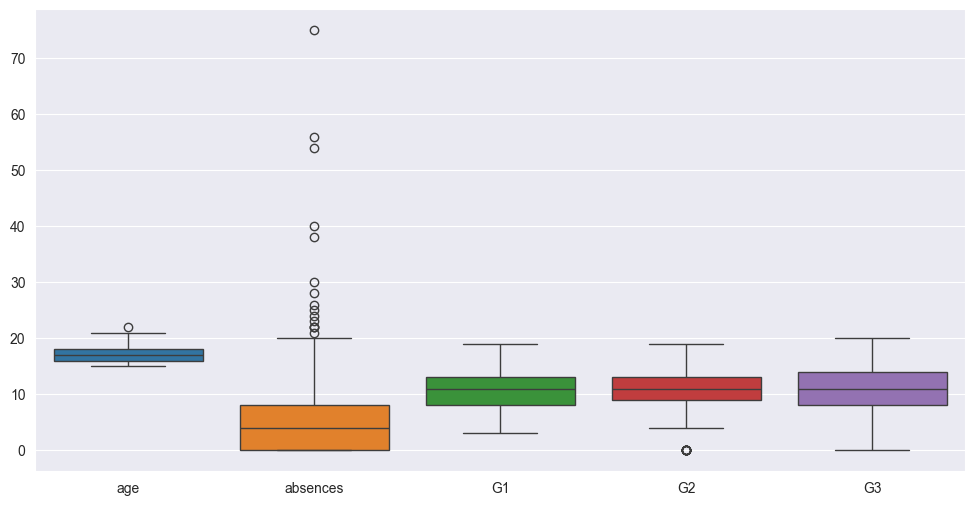

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'absences', 'G1', 'G2', 'G3']])
plt.show()

In [40]:
numeric_df = df.select_dtypes(include=np.number)

z_scores = np.abs(zscore(numeric_df))

outliers = (z_scores > 3)
print(np.sum(outliers))

49


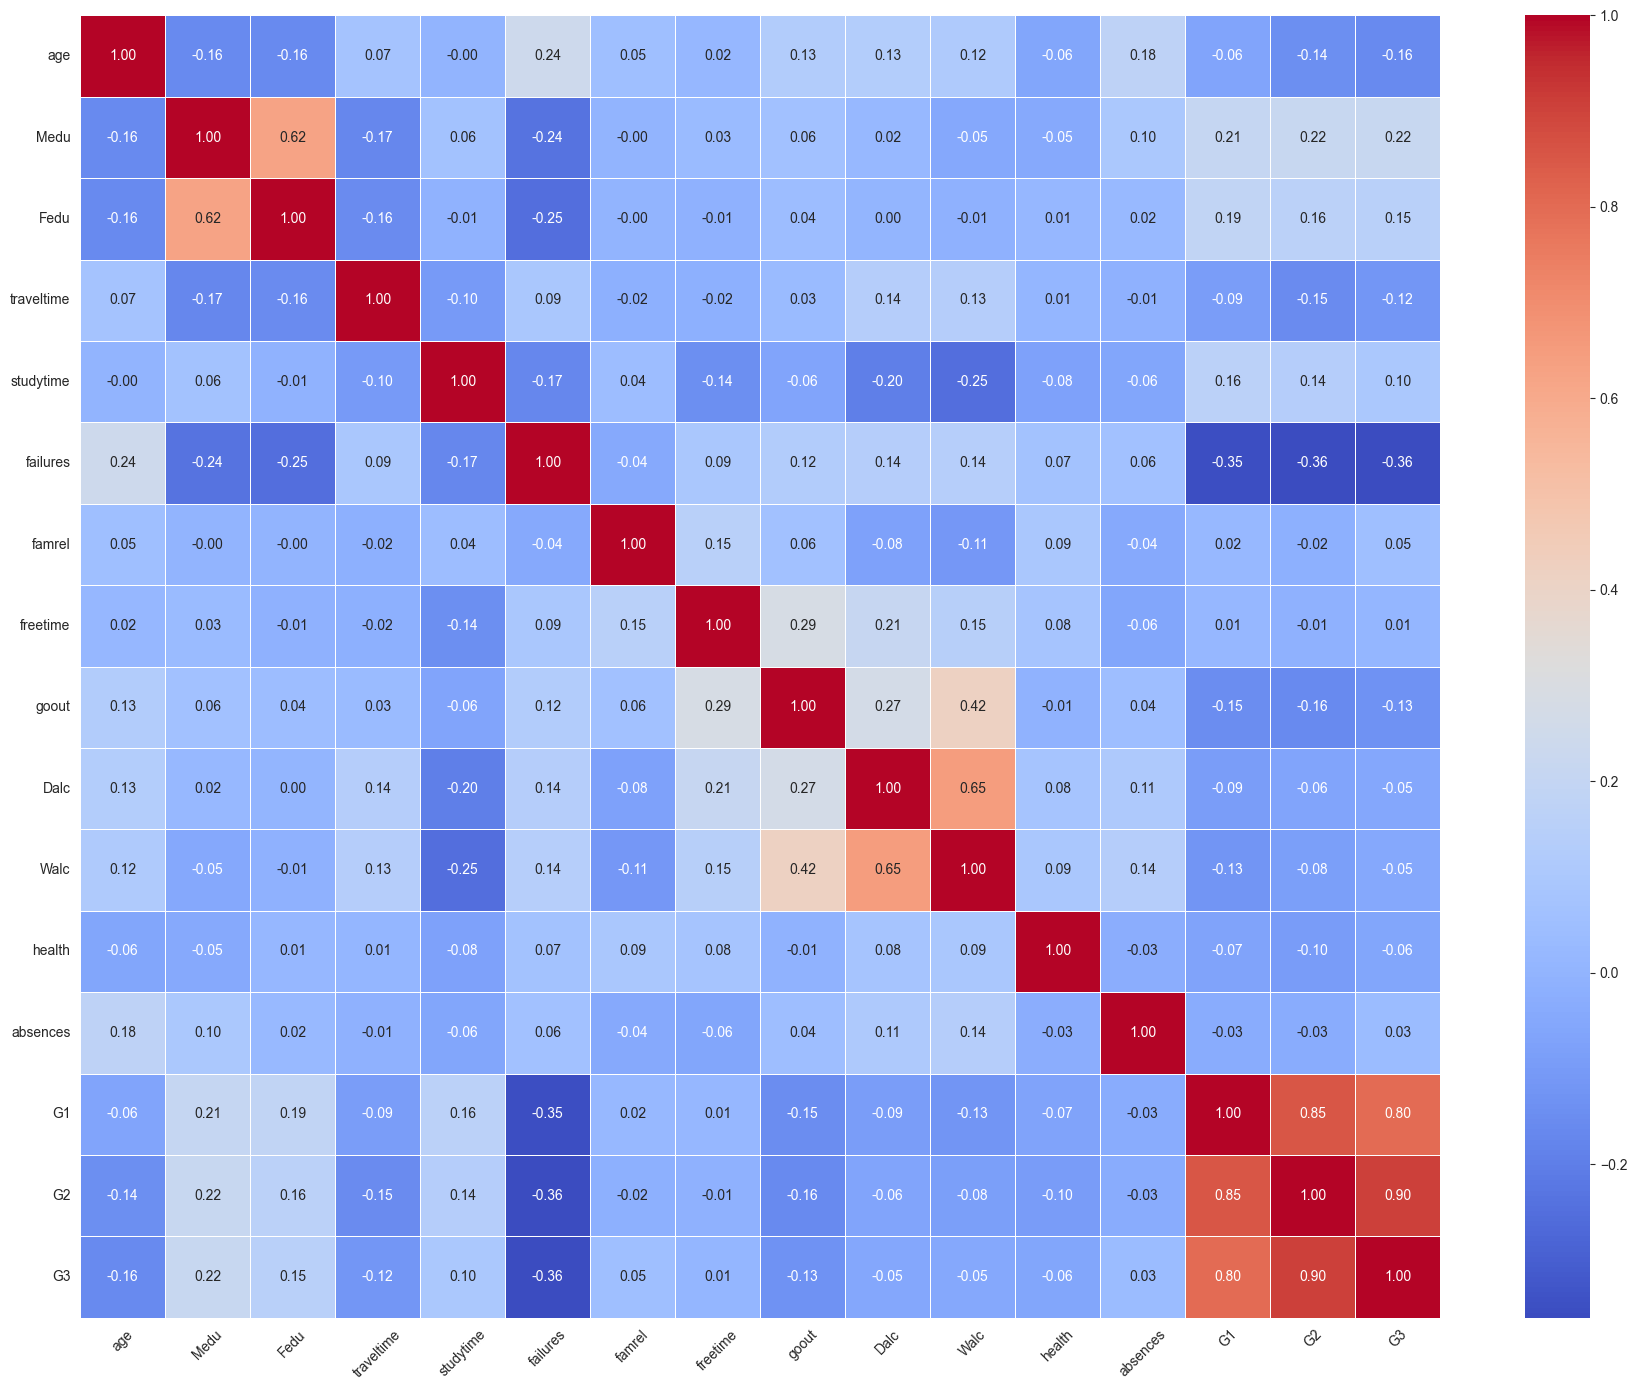

In [41]:
plt.figure(figsize=(18,14))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

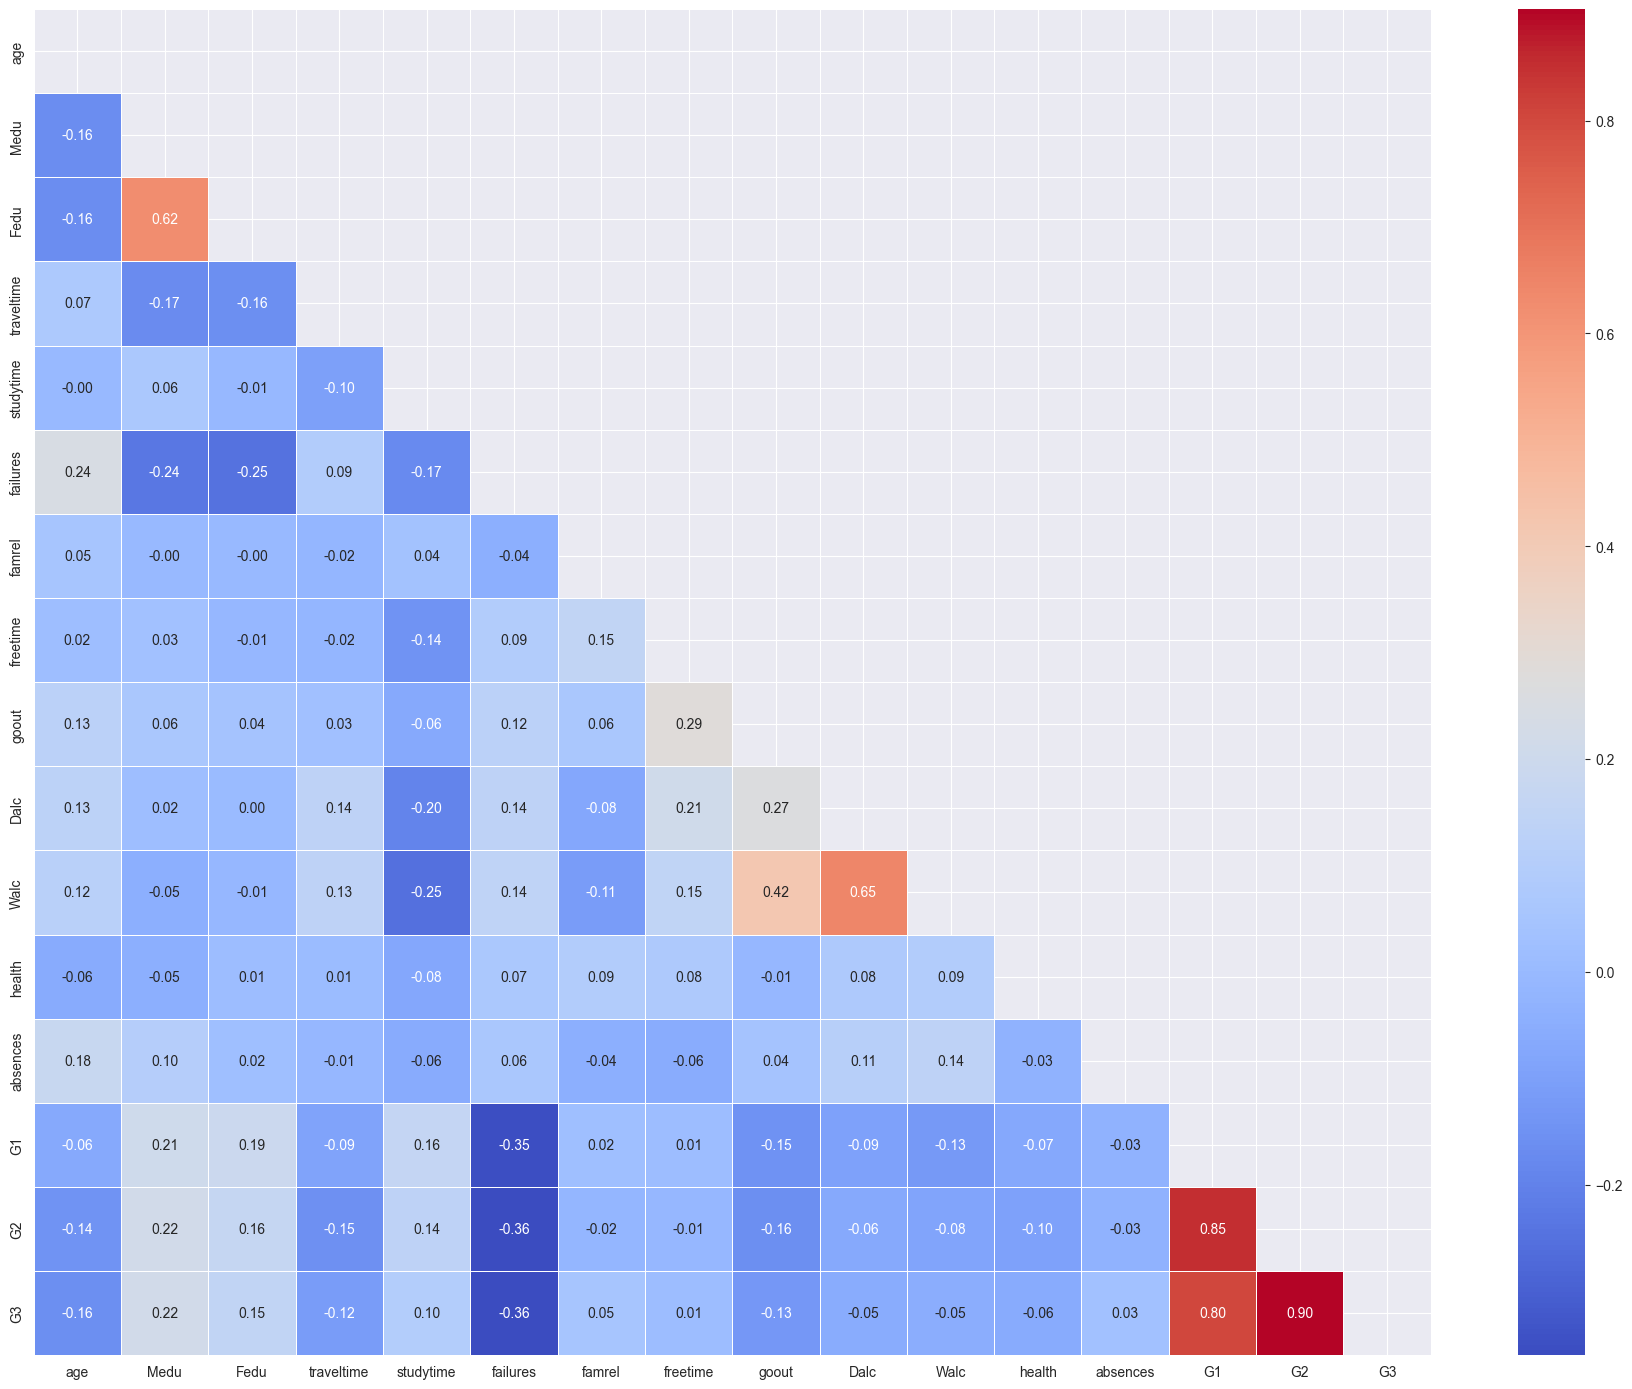

In [42]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18,14))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.tight_layout()
plt.show()

In [43]:
corr["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

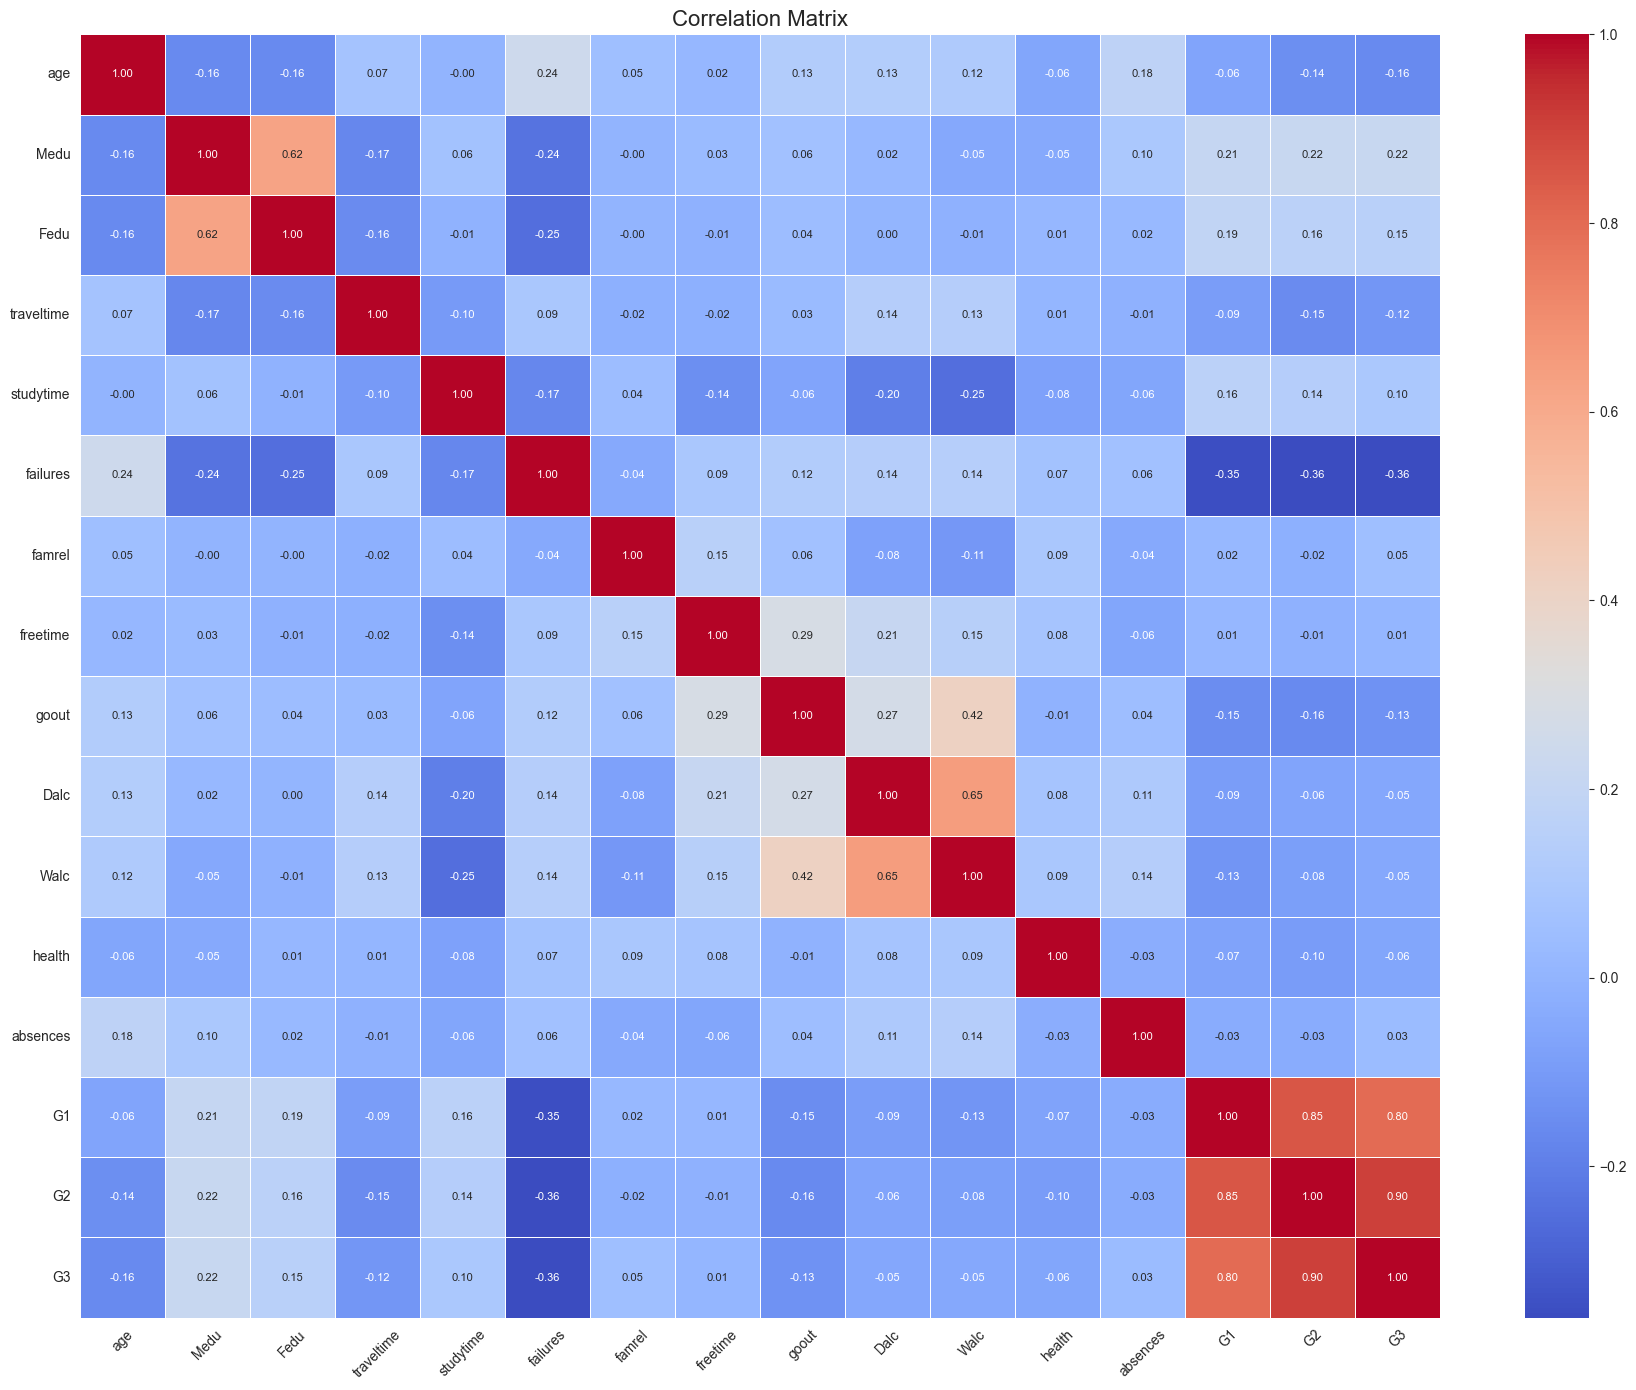

In [44]:
plt.figure(figsize=(18, 14))

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":8}, linewidths=0.5)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [74]:
df_model = df.drop(["G1", "G2"], axis=1)

df_encoded = pd.get_dummies(df_model, drop_first=True)

X= df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]

df_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G3                 395 non-null    int64
 14  school_MS          395 non-null    bool 
 15  sex_M              395 non-null    bool 
 16  address_U          395 non-null    bool 
 17  famsize_LE3        395 non-

The reason i drop these features is because I want the model to learn using realistic features such as family background, study time, alcohol consumption, and absences rather than the past grades(midterm exams).

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X['absences_log'] = np.log1p(X['absences'])



In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Linear Regression ---")
print(f"MSE:  {mean_squared_error(y_test, y_pred_lr):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.3f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_lr):.3f}")
print(f"R2:   {r2_score(y_test, y_pred_lr):.3f}")

--- Linear Regression ---
MSE:  17.604
RMSE: 4.196
MAE:  3.395
R2:   0.141


In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Regressor ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.3f}")

--- Random Forest Regressor ---
MSE: 15.487
RMSE: 3.935
MAE: 3.148
R2: 0.245


In [49]:
xgb = XGBRegressor(n_estimators = 300, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("--- XGBoost Regressor ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.3f}")
print(f"R2: {r2_score(y_test, y_pred_xgb):.3f}")

--- XGBoost Regressor ---
MSE: 15.213
RMSE: 3.900
MAE: 3.116
R2: 0.258


Regression model performance:

Three regression models were evaluated to predict students'final grade(G3):

| Model             | MSE       | RMSE     | MAE      | R²        |
| ----------------- | --------- | -------- | -------- | --------- |
| Linear Regression | 17.72     | 4.21     | 3.44     | 0.136     |
| Random Forest     | **15.23** | **3.90** | 3.11     | **0.257** |
| XGBoost           | 15.26     | 3.91     | **3.09** | 0.256     |


The regression analysis compared Linear Regression, Random Forest, and XGBoost in predicting students’ final grades (G3). The tree-based models performed noticeably better than Linear Regression, suggesting that the relationships in the data are not purely linear.

Random Forest achieved the highest R² (0.257), with XGBoost performing almost the same and producing slightly lower average prediction errors. Linear Regression showed the weakest performance, confirming that a simple linear approach is not sufficient for this task.

On average, the best models missed the actual grade by about 3 marks. Overall, the models explain roughly 25% of the variation in student performance, indicating moderate predictive ability with room for further improvement.

In [51]:
def categorize_grade(grade):
    if grade >= 15:
        return 'A'
    elif grade >= 10:
        return 'B'
    else:
        return 'C'
df_encoded['G3_cat'] = df_encoded['G3'].apply(categorize_grade)

In [52]:
le = LabelEncoder()
df_encoded['G3_cat_encoded'] = le.fit_transform(df_encoded['G3_cat'])


In [54]:
y_class = df_encoded['G3_cat_encoded']
X_class = df_encoded.drop(['G3', 'G3_cat', 'G3_cat_encoded'], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes = np.unique(y_train_c),
    y=y_train_c
)

weights = np.array([class_weights[label] for label in y_train_c])

In [55]:
print(df_encoded['G3_cat_encoded'].value_counts())

G3_cat_encoded
1    192
2    130
0     73
Name: count, dtype: int64


The students’ final grades were grouped into three categories: A (15 or higher), B (10–14), and C (below 10). These categories were converted into numerical labels for classification analysis, resulting in 192 students in class 1, 130 in class 2, and 73 in class 0. The dataset was then split into training and test sets to prepare for classification modeling and evaluation.

In [56]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train_c, y_train_c)
y_pred_c_lr = clf_lr.predict(X_test_c)

print("--- Logistic Regression (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_lr))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_lr, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_lr, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_lr, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_lr, average='macro'))
print("\nClassification Report (Logistic Regression):\n",
      classification_report(y_test_c, y_pred_c_lr, target_names=le.classes_))

--- Logistic Regression (Classification) ---
Accuracy: 0.4810126582278481
Precision (weighted): 0.5201520806153178
Recall (weighted):    0.4810126582278481
F1 Score (weighted): 0.48005902693426916
F1 Score (macro):    0.47754185381788483

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           A       0.64      0.35      0.45        20
           B       0.40      0.59      0.48        32
           C       0.57      0.44      0.50        27

    accuracy                           0.48        79
   macro avg       0.54      0.46      0.48        79
weighted avg       0.52      0.48      0.48        79



In [57]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_c, y_train_c)
y_pred_c_rf = clf_rf.predict(X_test_c)

print("--- Random Forest (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_rf))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_rf, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_rf, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_rf, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_rf, average='macro'))
print("\nClassification Report (Random Forest):\n",
      classification_report(y_test_c, y_pred_c_rf, target_names=le.classes_))

--- Random Forest (Classification) ---
Accuracy: 0.5189873417721519
Precision (weighted): 0.6084440438400543
Recall (weighted):    0.5189873417721519
F1 Score (weighted): 0.4885649267529512
F1 Score (macro):    0.4680898876404494

Classification Report (Random Forest):
               precision    recall  f1-score   support

           A       0.80      0.20      0.32        20
           B       0.46      0.81      0.58        32
           C       0.65      0.41      0.50        27

    accuracy                           0.52        79
   macro avg       0.63      0.47      0.47        79
weighted avg       0.61      0.52      0.49        79



In [65]:
clf_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
clf_xgb.fit(X_train_c, y_train_c, sample_weight = weights)
y_pred_c_xgb = clf_xgb.predict(X_test_c)

print("--- XGBoost (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_xgb))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_xgb, average='macro'))
print("\nClassification Report (XGBoost):\n",
      classification_report(y_test_c, y_pred_c_xgb, target_names=le.classes_))

--- XGBoost (Classification) ---
Accuracy: 0.5189873417721519
Precision (weighted): 0.5403583758014138
Recall (weighted):    0.5189873417721519
F1 Score (weighted): 0.5174540502410158
F1 Score (macro):    0.5128568971448227

Classification Report (XGBoost):
               precision    recall  f1-score   support

           A       0.57      0.40      0.47        20
           B       0.45      0.62      0.53        32
           C       0.62      0.48      0.54        27

    accuracy                           0.52        79
   macro avg       0.55      0.50      0.51        79
weighted avg       0.54      0.52      0.52        79



| Model                  | Accuracy  | Precision (weighted) | Recall (weighted) | F1 Score (weighted) | F1 Score (macro) |
|------------------------|-----------|----------------------|-------------------|---------------------|------------------|
| Random Forest          | **0.519** | **0.608**            | **0.519**         | 0.489               | 0.468            |
| XGBoost                | 0.519     | 0.540                | 0.519             | 0.517               | 0.513            |
| Logistic Regression    | 0.481     | 0.520                | 0.481             | 0.480               | 0.478            |


The classification analysis compared Random Forest, XGBoost, and Logistic Regression models for predicting students’ grade categories (A, B, C). After noticing class imbalance, you first adjusted the decision thresholds, but this produced no meaningful improvement because the models were still biased toward class B. You then applied class weighting in XGBoost, which reduced this bias and improved recall for the smaller classes A and C, giving a more balanced performance. Random Forest still achieved the highest overall accuracy (≈52%) and weighted F1 score, while XGBoost performed similarly with better class balance, and Logistic Regression remained slightly lower. Despite these adjustments, all models struggled somewhat with class A due to its smaller sample size, showing that student performance patterns overlap and the dataset has only moderate predictive power.

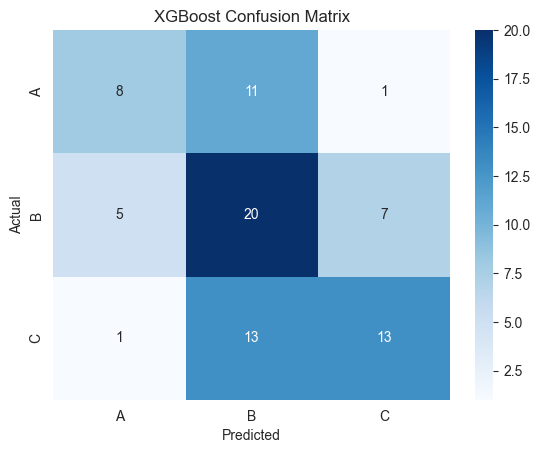

In [66]:
cm = confusion_matrix(y_test_c, y_pred_c_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

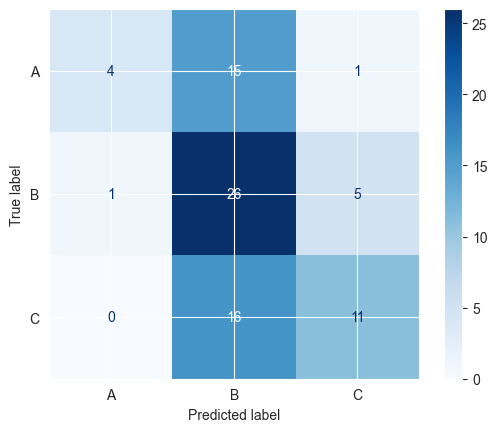

In [67]:
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test_c, y_test_c, display_labels = le.classes_, cmap = 'Blues', normalize = None)


Both models overpredict the middle class (B) but struggles for A and C because class B is largest in the dataset and the model learns to predict it more often.

Random Forest is better at catching B but misses A and C.

XGBoost is slightly fairer, improving A and C predictions at a small cost to B accuracy.

To improve predictions, we need to balance classes, tweak thresholds, and/or add stronger features. I best believe tweaking thresholds is the best option to balance predictions, because we don't need to change data, or add new features that could lead to over simplicity. we can call it the fastest, safest method without touching dataset or features especially good if our priority is to catch minority classes without hurting overall model logic.

In [68]:
thresholds = {
    0: 0.30,
    1: 0.45,
    2: 0.28
}

y_proba = clf_xgb.predict_proba(X_test_c)

y_pred_adjusted = []

for probs in y_proba:
    # Check if any class exceeds its threshold
    above_threshold = [i for i, p in enumerate(probs) if p > thresholds[i]]
    if above_threshold:
        # Pick class with highest probability among those above threshold
        y_pred_adjusted.append(above_threshold[np.argmax([probs[i] for i in above_threshold])])
    else:
        # Default to highest probability if none exceed threshold
        y_pred_adjusted.append(np.argmax(probs))

y_pred_adjusted = np.array(y_pred_adjusted)

Final Conclusion

In this project, we used regression and classification models to predict students’ final grades based on demographic, behavioral, and academic features. Tree-based models, particularly Random Forest and XGBoost, outperformed Linear and Logistic Regression, highlighting non-linear relationships in the data. Initial classification results showed a strong bias toward the dominant grade category; adjusting thresholds didn’t help much, but applying class weighting in XGBoost reduced this bias and improved predictions for the smaller classes.

Random Forest still achieved the highest accuracy and precision but remained biased toward class B, while XGBoost delivered similar accuracy with better macro-F1, giving a more balanced performance across all classes. Logistic Regression performed slightly weaker overall. The best models reached about 52% classification accuracy and explained roughly 25% of grade variance, reflecting moderate predictive power given the dataset size and overlapping student characteristics. Future improvements could include richer features, larger datasets, and further tuning to enhance model reliability and accuracy.